### This dataset has been taken from: https://github.com/CSSEGISandData/COVID-19

In [1]:
import pandas as pd
import os
from collections import Counter
from tqdm import tqdm
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [71]:
cd /media/thedrowsywinger/2A24A59224A56195/Poralekha/github/COVID-19/csse_covid_19_data/csse_covid_19_daily_reports

/media/thedrowsywinger/2A24A59224A56195/Poralekha/github/COVID-19/csse_covid_19_data/csse_covid_19_daily_reports


In [72]:
ls

01-22-2020.csv*  02-07-2020.csv*  02-23-2020.csv*  03-10-2020.csv*
01-23-2020.csv*  02-08-2020.csv*  02-24-2020.csv*  03-11-2020.csv*
01-24-2020.csv*  02-09-2020.csv*  02-25-2020.csv*  03-12-2020.csv*
01-25-2020.csv*  02-10-2020.csv*  02-26-2020.csv*  03-13-2020.csv*
01-26-2020.csv*  02-11-2020.csv*  02-27-2020.csv*  03-14-2020.csv*
01-27-2020.csv*  02-12-2020.csv*  02-28-2020.csv*  03-15-2020.csv*
01-28-2020.csv*  02-13-2020.csv*  02-29-2020.csv*  03-16-2020.csv*
01-29-2020.csv*  02-14-2020.csv*  03-01-2020.csv*  03-17-2020.csv*
01-30-2020.csv*  02-15-2020.csv*  03-02-2020.csv*  03-18-2020.csv*
01-31-2020.csv*  02-16-2020.csv*  03-03-2020.csv*  03-19-2020.csv*
02-01-2020.csv*  02-17-2020.csv*  03-04-2020.csv*  03-20-2020.csv*
02-02-2020.csv*  02-18-2020.csv*  03-05-2020.csv*  03-21-2020.csv*
02-03-2020.csv*  02-19-2020.csv*  03-06-2020.csv*  03-22-2020.csv*
02-04-2020.csv*  02-20-2020.csv*  03-07-2020.csv*  README.md*
02-05-2020.csv*  02-21-2020.csv*  03-08-2020.csv*
02-06-2020.csv*  

In [73]:
a = pd.read_csv("/media/thedrowsywinger/2A24A59224A56195/Poralekha/github/COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/01-23-2020.csv")

In [148]:
b = pd.read_csv("./02-25-2020.csv")

In [149]:
b

Province/State  Country/Region          Last Update  \
0                                  Hubei  Mainland China  2020-02-25T15:23:04   
1                              Guangdong  Mainland China  2020-02-25T08:53:02   
2                                  Henan  Mainland China  2020-02-25T12:43:02   
3                               Zhejiang  Mainland China  2020-02-25T09:13:05   
4                                  Hunan  Mainland China  2020-02-25T15:03:05   
..                                   ...             ...                  ...   
89                           Seattle, WA              US  2020-02-09T07:03:04   
90                             Tempe, AZ              US  2020-02-25T21:23:03   
91  Lackland, TX (From Diamond Princess)              US  2020-02-24T23:33:02   
92     Omaha, NE (From Diamond Princess)              US  2020-02-24T23:33:02   
93    Travis, CA (From Diamond Princess)              US  2020-02-24T23:33:02   

    Confirmed  Deaths  Recovered  
0       64786    2563      18971  
1        1347       7        822  
2        1271      19       1002  
3        1205       1        808  
4        1016       4        768  
..        ...     ...        ...  
89          1       0          1  
90          1       0          1  
91          0       0          0  
92          0       0          0  
93          0       0          0  

[94 rows x 6 columns]

What each CSV file looks like

In [74]:
a.head()

Province/State  Country/Region    Last Update  Confirmed  Deaths  Recovered
0          Anhui  Mainland China  1/23/20 17:00        9.0     NaN        NaN
1        Beijing  Mainland China  1/23/20 17:00       22.0     NaN        NaN
2      Chongqing  Mainland China  1/23/20 17:00        9.0     NaN        NaN
3         Fujian  Mainland China  1/23/20 17:00        5.0     NaN        NaN
4          Gansu  Mainland China  1/23/20 17:00        2.0     NaN        NaN

In [80]:
list_of_all_files = os.listdir()
actual_list = []
for i in list_of_all_files:
    if "csv" in i:
        actual_list.append(i)

In [94]:
main = []
province_list = []
country_list = []
confirmed = []
death_count = []
date_list = []
for j in tqdm(actual_list):
    a = pd.read_csv(j)
    for i in range(len(a)):
        date_list.append("Date: " + str(j[:-4]))
    for i in a['Province/State']:
        province_list.append(i)
    for i in a['Country/Region']:
        country_list.append(i)
    for i in a['Confirmed']:
        confirmed.append(i)
    for i in a['Deaths']:
        death_count.append(i)
main_df = pd.DataFrame({
    'date': date_list,
    'state': province_list,
    'country':country_list,
    'confirmed_case': confirmed,
    'death': death_count
})

100%|██████████| 61/61 [00:00<00:00, 251.69it/s]


In [96]:
duplicate_dates = list(main_df['date'])

In [97]:
all_dates = []
for x in duplicate_dates:
    if x not in all_dates:
        all_dates.append(x)
print(len(all_dates))

61


In [87]:
list_of_ = Counter(country_list).most_common(10)

In [88]:
list_of_countries = []
for i in list_of_:
    list_of_countries.append(i[0])
print(list_of_countries)

['US', 'Mainland China', 'China', 'Australia', 'Canada', 'France', 'Japan', 'Thailand', 'Singapore', 'Malaysia']


In [114]:
sample_df = main_df[50:90]
sample_df

date                         state         country  \
50  Date: 02-07-2020                           NaN              UK   
51  Date: 02-07-2020               South Australia       Australia   
52  Date: 02-07-2020                   Toronto, ON          Canada   
53  Date: 02-07-2020                           NaN          Russia   
54  Date: 02-07-2020                   Chicago, IL              US   
55  Date: 02-07-2020                San Benito, CA              US   
56  Date: 02-07-2020               Santa Clara, CA              US   
57  Date: 02-07-2020                           NaN         Belgium   
58  Date: 02-07-2020                           NaN        Cambodia   
59  Date: 02-07-2020                    London, ON          Canada   
60  Date: 02-07-2020                           NaN         Finland   
61  Date: 02-07-2020                         Tibet  Mainland China   
62  Date: 02-07-2020                           NaN           Nepal   
63  Date: 02-07-2020                           NaN           Spain   
64  Date: 02-07-2020                           NaN       Sri Lanka   
65  Date: 02-07-2020                           NaN          Sweden   
66  Date: 02-07-2020                    Boston, MA              US   
67  Date: 02-07-2020               Los Angeles, CA              US   
68  Date: 02-07-2020                   Madison, WI              US   
69  Date: 02-07-2020                    Orange, CA              US   
70  Date: 02-07-2020                   Seattle, WA              US   
71  Date: 02-07-2020                     Tempe, AZ              US   
72  Date: 02-25-2020                         Hubei  Mainland China   
73  Date: 02-25-2020                     Guangdong  Mainland China   
74  Date: 02-25-2020                         Henan  Mainland China   
75  Date: 02-25-2020                      Zhejiang  Mainland China   
76  Date: 02-25-2020                         Hunan  Mainland China   
77  Date: 02-25-2020                         Anhui  Mainland China   
78  Date: 02-25-2020                           NaN     South Korea   
79  Date: 02-25-2020                       Jiangxi  Mainland China   
80  Date: 02-25-2020                      Shandong  Mainland China   
81  Date: 02-25-2020  Diamond Princess cruise ship          Others   
82  Date: 02-25-2020                       Jiangsu  Mainland China   
83  Date: 02-25-2020                     Chongqing  Mainland China   
84  Date: 02-25-2020                       Sichuan  Mainland China   
85  Date: 02-25-2020                  Heilongjiang  Mainland China   
86  Date: 02-25-2020                       Beijing  Mainland China   
87  Date: 02-25-2020                      Shanghai  Mainland China   
88  Date: 02-25-2020                           NaN           Italy   
89  Date: 02-25-2020                         Hebei  Mainland China   

    confirmed_case   death  
50             3.0     0.0  
51             2.0     0.0  
52             2.0     0.0  
53             2.0     0.0  
54             2.0     0.0  
55             2.0     0.0  
56             2.0     0.0  
57             1.0     0.0  
58             1.0     0.0  
59             1.0     0.0  
60             1.0     0.0  
61             1.0     0.0  
62             1.0     0.0  
63             1.0     0.0  
64             1.0     0.0  
65             1.0     0.0  
66             1.0     0.0  
67             1.0     0.0  
68             1.0     0.0  
69             1.0     0.0  
70             1.0     0.0  
71             1.0     0.0  
72         64786.0  2563.0  
73          1347.0     7.0  
74          1271.0    19.0  
75          1205.0     1.0  
76          1016.0     4.0  
77           989.0     6.0  
78           977.0    10.0  
79           934.0     1.0  
80           756.0     6.0  
81           691.0     3.0  
82           631.0     0.0  
83           576.0     6.0  
84           529.0     3.0  
85           480.0    12.0  
86           400.0     4.0  
87           336.0     3.0  
88           3

In [183]:
another_dictionary = {}
for i in all_dates:
    con = []
    som = []
    for index, row in sample_df.iterrows():
        country = {}
        if i == row['date']:
            con.append(row['country'])
            som.append(row['confirmed_case'])
        country['countries'] = con
        country['affected'] = som
    another_dictionary[i] = country

In [208]:
list_of_countries

['US',
 'Mainland China',
 'China',
 'Australia',
 'Canada',
 'France',
 'Japan',
 'Thailand',
 'Singapore',
 'Malaysia']

In [211]:
country = []
cases = []
date = []
for index, row in main_df.iterrows():
    if row['country'] in list_of_countries:
        country.append(row['country'])
        cases.append(row['confirmed_case'])
        date.append(row['date'])

In [214]:
Counter(country)

Counter({'Mainland China': 1517,
         'Singapore': 60,
         'Japan': 61,
         'Thailand': 61,
         'Malaysia': 59,
         'France': 127,
         'Australia': 323,
         'Canada': 254,
         'UK': 40,
         'US': 1617,
         'China': 396})

In [216]:
print(len(date))

4515


In [220]:
new = pd.DataFrame()
new["date"] = date
new["country"] = country
new["confirmed_case"] = cases

In [221]:
new.head()

date         country  confirmed_case
0  Date: 02-07-2020  Mainland China         24953.0
1  Date: 02-07-2020  Mainland China          1034.0
2  Date: 02-07-2020  Mainland China          1006.0
3  Date: 02-07-2020  Mainland China           914.0
4  Date: 02-07-2020  Mainland China           772.0

In [184]:
# another_dictionary['Date: 02-07-2020']

In [210]:
outer = {}
for i in another_dictionary:
    countries = []
    case_count = []
    newest = {}
    for j, k in zip(another_dictionary[i]['countries'], another_dictionary[i]['affected']):
#         print(j, k)
        if j not in countries:
            countries.append(j)
            case_count.append(k)
        else:
            case_no = countries.index(j)
            case_count[case_no] += k
    for l,m in zip(countries, case_count):
        newest[l] = m
        
    outer[i] = newest
# print(outer)

let = pd.DataFrame()
countries = list_of_countries
cases = []
for key, value in outer.items():
    for inner_key, inner_value in value.items():
        print("country: ", inner_key, " case type: ", type(inner_value))
        if inner_key not in countries:
            countries.append(inner_key)
            even_inner = []
            even_inner.append(inner_value)
            cases.append(even_inner)
        else:
            case_no = countries.index(j)
            cases[case_no].append(int(inner_value))

total = 0
for i in cases:
    if len(i) > total:
        total = len(i)
print(total)
new_cases = []      
for i in cases:
    if len(i) == 0:
        new = [0.0] * total
        new_cases.append(new)
    else:
        new = i + [i[-1]] * (total - len(i))
        new_cases.append(new)
            

country:  UK  case type:  <class 'float'>
country:  Australia  case type:  <class 'float'>


IndexError: list index out of range

In [192]:
let["Date"] =  date_list
for i,j in zip(countries,new_cases):
    let[i] = j
# let["Confirmed"] = new_cases

In [193]:
let

Date   UK  Australia  Canada  Russia    US  Belgium  Cambodia  \
0  Date: 02-07-2020  3.0        2.0     3.0     2.0  12.0      1.0       1.0   
1  Date: 02-25-2020  3.0        2.0     3.0     2.0  12.0      1.0       1.0   

   Finland  Mainland China  Nepal  Spain  Sri Lanka  Sweden  South Korea  \
0      1.0             1.0    1.0    1.0        1.0     1.0        977.0   
1      1.0         75567.0    1.0    1.0        1.0     1.0        977.0   

   Others  Italy  
0   691.0  322.0  
1   691.0  322.0

In [180]:
print(len(countries))
print(cases)

16
[[3.0], [2.0], [3.0], [2.0], [12.0], [1.0], [1.0], [1.0], [1.0, 75567], [1.0], [1.0], [1.0], [1.0], [977.0], [691.0], [322.0]]


In [181]:
u = [0.0,2.0, 3.4]
u.append(0.0)
print(u)

[0.0, 2.0, 3.4, 0.0]


In [196]:
duplicate_dates = list(main_df['date'])
all_dates = []
for x in duplicate_dates:
    if x not in all_dates:
        all_dates.append(x)
len(all_dates)

61

In [231]:
def checking(df):
    duplicate_dates = list(df['date'])
    all_dates = []
    for x in duplicate_dates:
        if x not in all_dates:
            all_dates.append(x)
            
    another_dictionary = {}
    for i in all_dates:
        con = []
        som = []
        for index, row in df.iterrows():
            country = {}
            if i == row['date']:
                con.append(row['country'])
                som.append(row['confirmed_case'])
            country['countries'] = con
            country['affected'] = som
        another_dictionary[i] = country
    outer = {}

    for i in another_dictionary:
        countries = []
        case_count = []
        newest = {}
        for j, k in zip(another_dictionary[i]['countries'], another_dictionary[i]['affected']):
            if j not in countries:
                countries.append(j)
                case_count.append(k)
            else:
                case_no = countries.index(j)
                case_count[case_no] += k
        for l,m in zip(countries, case_count):
            newest[l] = m

        outer[i] = newest
        
    let = pd.DataFrame()
    countries = []
    cases = []
    for key, value in outer.items():
        for inner_key, inner_value in value.items():
#             print("country: ", inner_key, " case type: ", type(inner_value))
            if inner_key not in countries:
                countries.append(inner_key)
                even_inner = []
                even_inner.append(inner_value)
                cases.append(even_inner)
            else:
                if inner_value.is_integer():
                    case_no = countries.index(j)
                    cases[case_no].append(int(inner_value))
                else:
                    case_no = countries.index(j)
                    cases[case_no].append(0)

    total = 0
    for i in cases:
        if len(i) > total:
            total = len(i)
#     print(total)
    new_cases = []      
    for i in cases:
        if len(i) == 0:
            new = [0.0] * total
            new_cases.append(new)
        else:
            new = i + [i[-1]] * (total - len(i))
            new_cases.append(new)
    
#     let["Date"] =  all_dates
    for i,j in zip(countries,new_cases):
        let[i] = j
        
    return let

In [232]:
sam = checking(new)

In [234]:
sam

Mainland China  Singapore  Japan  Thailand  Malaysia   France  Australia  \
0           34075.0       30.0   25.0      25.0      12.0      6.0       15.0   
1           34075.0       30.0   25.0      25.0      12.0  77660.0       15.0   
2           34075.0       30.0   25.0      25.0      12.0    170.0       15.0   
3           34075.0       30.0   25.0      25.0      12.0     91.0       15.0   
4           34075.0       30.0   25.0      25.0      12.0     37.0       15.0   
..              ...        ...    ...       ...       ...      ...        ...   
565         34075.0       30.0   25.0      25.0      12.0   1086.0       15.0   
566         34075.0       30.0   25.0      25.0      12.0    599.0       15.0   
567         34075.0       30.0   25.0      25.0      12.0   1314.0       15.0   
568         34075.0       30.0   25.0      25.0      12.0    455.0       15.0   
569         34075.0       30.0   25.0      25.0      12.0   1465.0       15.0   

     Canada   UK    US    China  
0       7.0  3.0  12.0  80921.0  
1       7.0  3.0  12.0  80921.0  
2       7.0  3.0  12.0  80921.0  
3       7.0  3.0  12.0  80921.0  
4       7.0  3.0  12.0  80921.0  
..      ...  ...   ...      ...  
565     7.0  3.0  12.0  80921.0  
566     7.0  3.0  12.0  80921.0  
567     7.0  3.0  12.0  80921.0  
568     7.0  3.0  12.0  80921.0  
569     7.0  3.0  12.0  80921.0  

[570 rows x 11 columns]

In [139]:
newest = {}
for key, value in another_dictionary['Date: 02-07-2020'].items():
    if key == "countries":
        countries = []
        for x in value:
            if x not in countries:
                countries.append(x)
        newest['countries'] = countries
    elif key == "affected":
        

ues


In [111]:
# new_df = pd.DataFrame()
a_dictionary = {}
for i in list_of_countries:
    case_of_confirmed = []
    date_list = []
    for index, row in tqdm(sample_df.iterrows()):
        if i == row['country']:
            for k in all_dates:
                if k == row['date']:
                    print(i)
                    print(k)
                    print(row['confirmed_case'])
                    case_of_confirmed.append(row['confirmed_case'])
#             date_list.append(row['date'])
    a_dictionary[i] = case_of_confirmed

30it [00:00, 1838.61it/s]
30it [00:00, 452.25it/s]
30it [00:00, 584.35it/s]

US
Date: 02-07-2020
2.0
US
Date: 02-07-2020
2.0
US
Date: 02-07-2020
2.0
Mainland China
Date: 02-07-2020
18.0



30it [00:00, 211.53it/s]
0it [00:00, ?it/s]

Australia
Date: 02-07-2020
5.0
Australia
Date: 02-07-2020
4.0
Australia
Date: 02-07-2020
4.0
Australia
Date: 02-07-2020
2.0
Canada
Date: 02-07-2020
4.0
Canada
Date: 02-07-2020
2.0


30it [00:00, 289.66it/s]
30it [00:00, 398.40it/s]
0it [00:00, ?it/s]

Canada
Date: 02-07-2020
1.0
France
Date: 02-07-2020
6.0
Japan
Date: 02-07-2020
25.0


30it [00:00, 232.61it/s]
30it [00:00, 382.21it/s]
30it [00:00, 414.20it/s]
0it [00:00, ?it/s]

Thailand
Date: 02-07-2020
25.0
Singapore
Date: 02-07-2020
30.0


30it [00:00, 259.57it/s]

Malaysia
Date: 02-07-2020
12.0


In [112]:
for key, value in a_dictionary.items():
    print(value)
#     total = 0
#     for i in value:
#         if i.is_integer():
#             total += int(i)
#     a_dictionary[key] = total

[2.0, 2.0, 2.0]
[18.0]
[]
[5.0, 4.0, 4.0, 2.0]
[4.0, 2.0, 1.0]
[6.0]
[25.0]
[25.0]
[30.0]
[12.0]


In [109]:
a_dictionary

{'US': 6,
 'Mainland China': 18,
 'China': 0,
 'Australia': 15,
 'Canada': 7,
 'France': 6,
 'Japan': 25,
 'Thailand': 25,
 'Singapore': 30,
 'Malaysia': 12}

In [24]:
# list_of_all_files

In [5]:
actual_list = []
for i in list_of_all_files:
    if "csv" in i:
        actual_list.append(i)

100%|██████████| 61/61 [00:00<00:00, 266.22it/s]


In [7]:
main_df = pd.DataFrame({
    'date': date_list,
    'state': province_list,
    'country':country_list,
    'confirmed_case': confirmed,
    'death': death_count
})

In [9]:
len(main_df)

7926

In [10]:
Counter(country_list)

Counter({'Mainland China': 1517,
         'Others': 33,
         'Singapore': 60,
         'Hong Kong': 48,
         'Japan': 61,
         'Thailand': 61,
         'South Korea': 48,
         'Taiwan': 48,
         'Germany': 55,
         'Malaysia': 59,
         'Macau': 48,
         'Vietnam': 59,
         'France': 127,
         'Australia': 323,
         'United Arab Emirates': 54,
         'Canada': 254,
         'India': 53,
         'Italy': 52,
         'Philippines': 54,
         'UK': 40,
         'Russia': 51,
         'US': 1617,
         'Belgium': 48,
         'Cambodia': 56,
         'Finland': 54,
         'Nepal': 58,
         'Spain': 51,
         'Sri Lanka': 56,
         'Sweden': 52,
         'Iran': 32,
         'Bahrain': 28,
         'Kuwait': 28,
         'Austria': 27,
         'Oman': 28,
         'Afghanistan': 28,
         'Algeria': 27,
         'Croatia': 27,
         'Egypt': 38,
         'Iraq': 29,
         'Israel': 31,
         'Lebanon': 31,
       

In [11]:
Counter(country_list).most_common(10)

[('US', 1617),
 ('Mainland China', 1517),
 ('China', 396),
 ('Australia', 323),
 ('Canada', 254),
 ('France', 127),
 ('Japan', 61),
 ('Thailand', 61),
 ('Singapore', 60),
 ('Malaysia', 59)]

In [217]:
def specific_country(search):
#     total_confirmed_case = 0.0
    case_of_confirmed = []
    case_of_death = []
    date = []
    state = []
    for index, row in main_df.iterrows():
        if row['country'] == search:
            case_of_confirmed.append(row['confirmed_case'])
            case_of_death.append(row['death'])
            date.append(row['date'])
            state.append(row['state'])

    # print(total_confirmed_case)
    bd_df = pd.DataFrame({
        'date': date,
        'confirmed_case': case_of_confirmed,
        'death': case_of_death,
        'state': state
    })
    
    return bd_df

In [221]:
bd_df = specific_country("Bangladesh")

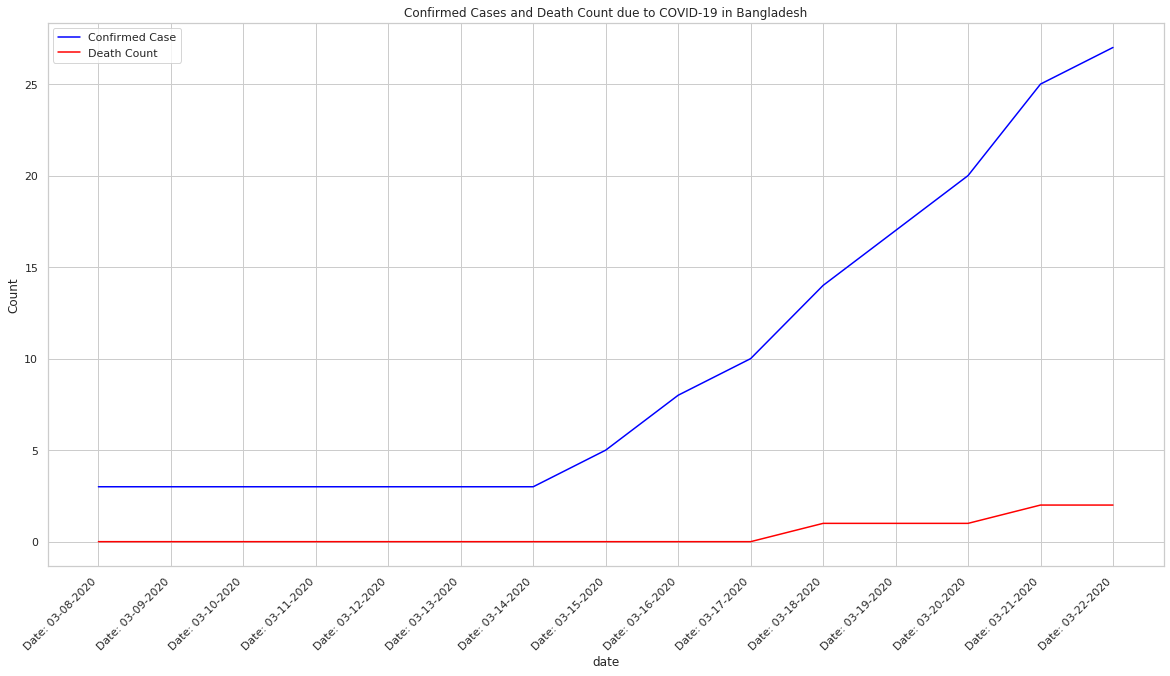

In [409]:
ax = plt.figure(figsize=(20,10))

# Add title
ax = plt.title("Confirmed Cases and Death Count due to COVID-19 in Bangladesh")


ax = sns.lineplot(y=bd_df['confirmed_case'], x=bd_df['date'], color = 'Blue', label = "Confirmed Case")

ax = sns.lineplot(x = bd_df['date'], y = bd_df['death'], color = 'red', label = "Death Count")

ax.legend()



# ax = sns.color_palette("RdBu", n_colors=7)

ax.set_xticklabels(labels=bd_df['date'], rotation=45, ha='right')


ax = plt.ylabel("Count")

In [232]:
plt.figure(figsize=(14,6))

# Add title
plt.title("Rise of COVID-19 in Bangladesh")
 
sns.lineplot(data=bd_df['confirmed_case'], label="Confirmed Case")
sns.lineplot(data=bd_df['death'], label="Death Toll", color = "red")
# Add label for horizontal axis
plt.xlabel("Date")

Text(0.5, 0, 'Date')

In [438]:
us_df = specific_country("US")

us_df.head()


date  confirmed_case  death            state
0  Date: 02-07-2020             2.0    0.0      Chicago, IL
1  Date: 02-07-2020             2.0    0.0   San Benito, CA
2  Date: 02-07-2020             2.0    0.0  Santa Clara, CA
3  Date: 02-07-2020             1.0    0.0       Boston, MA
4  Date: 02-07-2020             1.0    0.0  Los Angeles, CA

In [439]:
Counter(list(us_df['state']))

Counter({'Chicago, IL': 30,
         'San Benito, CA': 36,
         'Santa Clara, CA': 35,
         'Boston, MA': 34,
         'Los Angeles, CA': 38,
         'Madison, WI': 34,
         'Orange, CA': 32,
         'Seattle, WA': 30,
         'Tempe, AZ': 35,
         'Unassigned Location (From Diamond Princess)': 15,
         'San Diego County, CA': 28,
         'Humboldt County, CA': 18,
         'Sacramento County, CA': 18,
         'San Antonio, TX': 26,
         'Lackland, TX (From Diamond Princess)': 17,
         'Omaha, NE (From Diamond Princess)': 17,
         'Travis, CA (From Diamond Princess)': 17,
         'Washington': 23,
         'Chicago': 1,
         'Illinois': 20,
         'California': 19,
         'Arizona': 19,
         'Ashland, NE': 1,
         'Travis, CA': 1,
         'Lackland, TX': 1,
         'Portland, OR': 3,
         'Snohomish County, WA': 10,
         'Providence, RI': 6,
         'King County, WA': 8,
         'Cook County, IL': 8,
         'Grafton Co

In [440]:
duplicates_included = list(us_df['state'])

In [441]:
duplicate_dates = list(us_df['date'])

In [442]:
h = duplicate_dates[6]

In [443]:
if h not in duplicate_dates:
    pass
else: 
    print("no")

no


In [444]:
all_dates = []
for x in duplicate_dates:
    if x not in all_dates:
        all_dates.append(x)

In [445]:
len(all_dates)

61

In [446]:
all_states = []
for x in duplicates_included:
    if x not in all_states:
        all_states.append(x)

In [447]:
new_df = pd.DataFrame()
a_dictionary = {}
for i in all_states:
    case_of_confirmed = []
    date_list = []
    for index, row in tqdm(us_df.iterrows()):
        if i == row['state']:
            case_of_confirmed.append(row['confirmed_case'])
            date_list.append(row['date'])
    a_dictionary[i] = case_of_confirmed

1617it [00:00, 9897.03it/s]
1617it [00:00, 11750.16it/s]
1617it [00:00, 11742.24it/s]
1617it [00:00, 11434.92it/s]
1617it [00:00, 11893.80it/s]
1617it [00:00, 10751.23it/s]
1617it [00:00, 10138.73it/s]
1617it [00:00, 9356.25it/s]
1617it [00:00, 10347.46it/s]
1617it [00:00, 11522.09it/s]
1617it [00:00, 10398.69it/s]
1617it [00:00, 10219.87it/s]
1617it [00:00, 9235.74it/s]
1617it [00:00, 9264.53it/s]
1617it [00:00, 9003.03it/s]
1617it [00:00, 9227.36it/s]
1617it [00:00, 9227.12it/s]
1617it [00:00, 9034.51it/s]
1617it [00:00, 8195.64it/s]
1617it [00:00, 8527.91it/s]
1617it [00:00, 8160.34it/s]
1617it [00:00, 8660.94it/s]
1617it [00:00, 8609.87it/s]
1617it [00:00, 7859.78it/s]
1617it [00:00, 8486.59it/s]
1617it [00:00, 9129.04it/s]
1617it [00:00, 9170.49it/s]
1617it [00:00, 8998.69it/s]
1617it [00:00, 8724.91it/s]
1617it [00:00, 9067.24it/s]
1617it [00:00, 8660.79it/s]
1617it [00:00, 9139.96it/s]
1617it [00:00, 9242.53it/s]
1617it [00:00, 8815.31it/s]
1617it [00:00, 8323.04it/s]
1617it [00

In [ ]:
# a_dictionary

In [448]:
length_of_lists = []
for key, value in a_dictionary.items():
    a = len(value)
    length_of_lists.append(a)

In [449]:
maximum = max(length_of_lists)

In [450]:
maximum = 61

In [451]:
state_counter = []
cases_counter = []
for key, value in a_dictionary.items():
    if len(value) == 0:
        new = [0] * maximum
        value = new
    else:
        new = value + [value[-1]] * (maximum-len(value))
        value = new
    state_counter.append(key)
    cases_counter.append(value)

In [452]:
cases_counter[0]

[2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0]

In [453]:
new_df = pd.DataFrame()

In [454]:
# new_df['Date'] = all_dates

In [455]:

for f, b in zip(state_counter, cases_counter):
    new_df[f] = b

In [456]:
new_df

Chicago, IL  San Benito, CA  Santa Clara, CA  Boston, MA  Los Angeles, CA  \
0           2.0             2.0              2.0         1.0              1.0   
1           2.0             2.0              2.0         1.0              1.0   
2           2.0             2.0              1.0         1.0              1.0   
3           2.0             2.0              1.0         1.0              1.0   
4           2.0             2.0              2.0         1.0              1.0   
..          ...             ...              ...         ...              ...   
56          3.0             2.0             20.0         1.0             14.0   
57          3.0             2.0             20.0         1.0             14.0   
58          3.0             2.0             20.0         1.0             14.0   
59          3.0             2.0             20.0         1.0             14.0   
60          3.0             2.0             20.0         1.0             14.0   

    Madison, WI  Orange, CA  Seattle, WA  Tempe, AZ  \
0           1.0         1.0          1.0        1.0   
1           1.0         1.0          1.0        1.0   
2           1.0         1.0          1.0        1.0   
3           1.0         1.0          1.0        1.0   
4           1.0         1.0          1.0        1.0   
..          ...         ...          ...        ...   
56          1.0         1.0          9.0        1.0   
57          1.0         1.0          9.0        1.0   
58          1.0         1.0          9.0        1.0   
59          1.0         1.0          9.0        1.0   
60          1.0         1.0          9.0        1.0   

    Unassigned Location (From Diamond Princess)  ...  South Dakota  \
0                                          36.0  ...           0.0   
1                                          36.0  ...           8.0   
2                                          42.0  ...           8.0   
3                                          42.0  ...           8.0   
4                                          44.0  ...           9.0   
..                                          ...  ...           ...   
56                                         45.0  ...          21.0   
57                                         45.0  ...          21.0   
58                                         45.0  ...          21.0   
59                                         45.0  ...          21.0   
60                                         45.0  ...          21.0   

    West Virginia  Wyoming  Alabama  Puerto Rico  Virgin Islands, U.S.  Guam  \
0             0.0      0.0      5.0          3.0                   1.0   3.0   
1             0.0      0.0      6.0          5.0                   1.0   3.0   
2             0.0      1.0     12.0          5.0                   1.0   3.0   
3             0.0      1.0     29.0          5.0                   1.0   5.0   
4             0.0      2.0     39.0          5.0                   1.0  12.0   
..            ...      ...      ...          ...                   ...   ...   
56           12.0     24.0    138.0         23.0                   1.0  27.0   
57           12.0     24.0    138.0         23.0                   1.0  27.0   
58           12.0     24.0    138.0         23.0                   1.0  27.0   
59           12.0     24.0    138.0         23.0                   1.0  27.0   
60           12.0     24.0    138.0         23.0                   1.0  27.0   

    Virgin Islands  United States Virgin Islands   US  
0              1.0                           2.0  1.0  
1              2.0                           2.0  1.0  
2              2.0                           3.0  1.0  
3              3.0                           6.0  1.0  
4              3.0                           6.0  1.0  
..             ...                           ...  ...  
56             3.0                           6.0  1.0  
57             3.0                           6.0  1.0  
58             3.0                           6.0  1.0  
59      

In [458]:
new_date_df = pd.DataFrame()

In [459]:
new_date_df["Date"] = all_dates

In [460]:
u = []
for i in new_df:
    print(i)

Chicago, IL
San Benito, CA
Santa Clara, CA
Boston, MA
Los Angeles, CA
Madison, WI
Orange, CA
Seattle, WA
Tempe, AZ
Unassigned Location (From Diamond Princess)
San Diego County, CA
Humboldt County, CA
Sacramento County, CA
San Antonio, TX
Lackland, TX (From Diamond Princess)
Omaha, NE (From Diamond Princess)
Travis, CA (From Diamond Princess)
Washington
Chicago
Illinois
California
Arizona
Ashland, NE
Travis, CA
Lackland, TX
Portland, OR
Snohomish County, WA
Providence, RI
King County, WA
Cook County, IL
Grafton County, NH
Hillsborough, FL
New York City, NY
Placer County, CA
San Mateo, CA
Sarasota, FL
Sonoma County, CA
Umatilla, OR
Fulton County, GA
Washington County, OR
 Norfolk County, MA
Berkeley, CA
Maricopa County, AZ
Wake County, NC
Westchester County, NY
Orange County, CA
Contra Costa County, CA
Bergen County, NJ
Harris County, TX
San Francisco County, CA
Clark County, NV
Fort Bend County, TX
Grant County, WA
Queens County, NY
Santa Rosa County, FL
Williamson County, TN
New York C

In [466]:
ax = plt.figure(figsize=(20,6))

# Add title
ax = plt.title("Confirmed Cases and Death Count due to COVID-19 in USA")

for i in tqdm(new_df):    
    ax = sns.lineplot(x=new_date_df['Date'], y=new_df[i], label = str(i))

# ax = sns.lineplot(x = bd_df['date'], y = bd_df['death'], color = 'red', label = "Death Count")

ax.legend()



# ax = sns.color_palette("RdBu", n_colors=7)

ax.set_xticklabels(labels=new_date_df['Date'], rotation=45, ha='right')


ax = plt.ylabel("Count")


100%|██████████| 61/61 [00:03<00:00, 13.46it/s]
63it [00:03, 12.39it/s]                        
65it [00:03, 11.54it/s]
67it [00:03, 11.20it/s]
69it [00:04, 11.75it/s]
71it [00:04, 12.13it/s]
73it [00:05,  3.56it/s]
75it [00:05,  4.53it/s]
77it [00:05,  5.63it/s]
79it [00:06,  6.77it/s]
81it [00:06,  7.88it/s]
83it [00:06,  8.50it/s]
85it [00:06,  9.16it/s]
87it [00:07,  7.20it/s]
89it [00:07,  8.00it/s]
91it [00:07,  8.84it/s]
93it [00:07,  9.51it/s]
95it [00:07,  9.66it/s]
97it [00:07, 10.09it/s]
99it [00:08, 10.28it/s]
101it [00:08,  7.32it/s]
103it [00:08,  8.00it/s]
104it [00:08,  8.01it/s]
105it [00:09,  8.42it/s]
106it [00:09,  8.75it/s]
107it [00:09,  8.99it/s]
108it [00:09,  8.59it/s]
109it [00:09,  7.74it/s]
110it [00:09,  7.68it/s]
111it [00:09,  6.85it/s]
112it [00:10,  4.62it/s]
113it [00:10,  5.10it/s]
114it [00:10,  5.45it/s]
115it [00:10,  5.98it/s]
116it [00:10,  6.09it/s]
117it [00:11,  5.85it/s]
118it [00:11,  6.08it/s]
119it [00:11,  6.12it/s]
120it [00:11,  6.35it

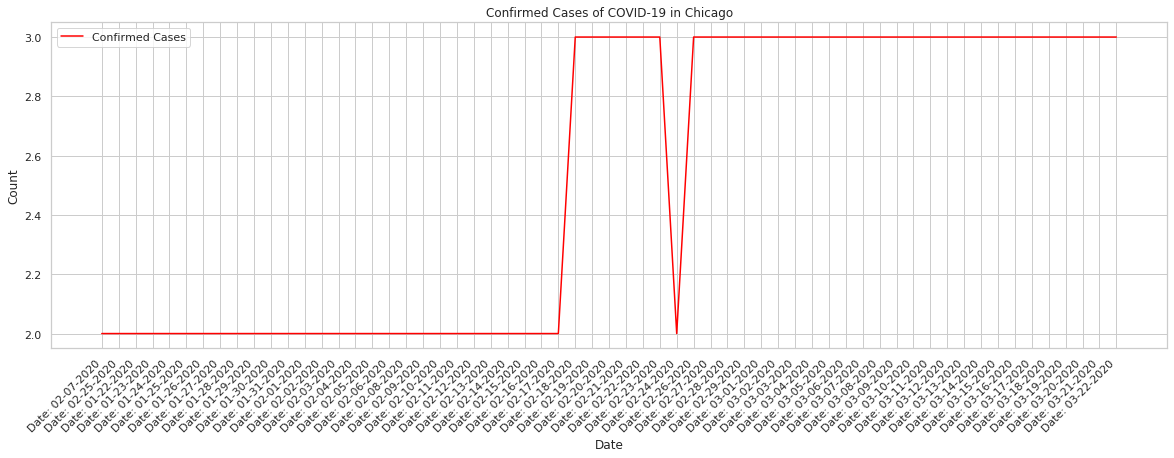

In [474]:
ax = plt.figure(figsize=(20,6))

# Add title
ax = plt.title("Confirmed Cases of COVID-19 in Chicago")

# for i in tqdm(new_df):    
#     ax = sns.lineplot(x=new_date_df['Date'], y=new_df[i], label = str(i))

ax = sns.lineplot(x = new_date_df['Date'], y = new_df['Chicago, IL'], color = 'red', label = "Confirmed Cases")

ax.legend()



# ax = sns.color_palette("RdBu", n_colors=7)

ax.set_xticklabels(labels=new_date_df['Date'], rotation=45, ha='right')


ax = plt.ylabel("Count")